In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-dataset/test/Benign/6588.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6399.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6324.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/7222.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6560.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6943.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6365.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6459.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6653.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/7006.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6925.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/7245.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6800.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6899.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6831.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/7061.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6337.jpg
/kaggle/input/skin-cancer-dataset/test/Benign/6513.jpg
/kaggle/in

In [13]:
!pip install tensorflow opencv-python pandas matplotlib seaborn 


**1.Load & Preprocess Data**

In [14]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [15]:
#Dataset directories
BASE_DIR = "/kaggle/input/skin-cancer-dataset/"
TRAIN_DIR = os.path.join(BASE_DIR, "/kaggle/input/skin-cancer-dataset/train")
TEST_DIR = os.path.join(BASE_DIR, "/kaggle/input/skin-cancer-dataset/test")

In [17]:
#Dataset directories
BASE_DIR = "/kaggle/input/skin-cancer-dataset/"
TRAIN_DIR = os.path.join(BASE_DIR, "/kaggle/input/skin-cancer-dataset/train")
TEST_DIR = os.path.join(BASE_DIR, "/kaggle/input/skin-cancer-dataset/test")

In [18]:
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range = 20,
          width_shift_range = 0.2,
          height_shift_range= 0.2,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
)


In [19]:

#Rescaling only for Testing 
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Correct


# ✅ Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
TRAIN_DIR = '/kaggle/input/skin-cancer-dataset/train'  # Replace with your actual path

# ✅ Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # optional, for splitting training and validation
)

# ✅ Load training data
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'  # Use 'training' split
)

# ✅ Load validation data
validation_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Use 'validation' split
)


Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.


In [23]:
#Load Testing Data
test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [24]:

#Print class labels
print("Class Mapping:",train_generator.class_indices)

Class Mapping: {'Benign': 0, 'Malignant': 1}


**2.Exploratory Data Analysis**

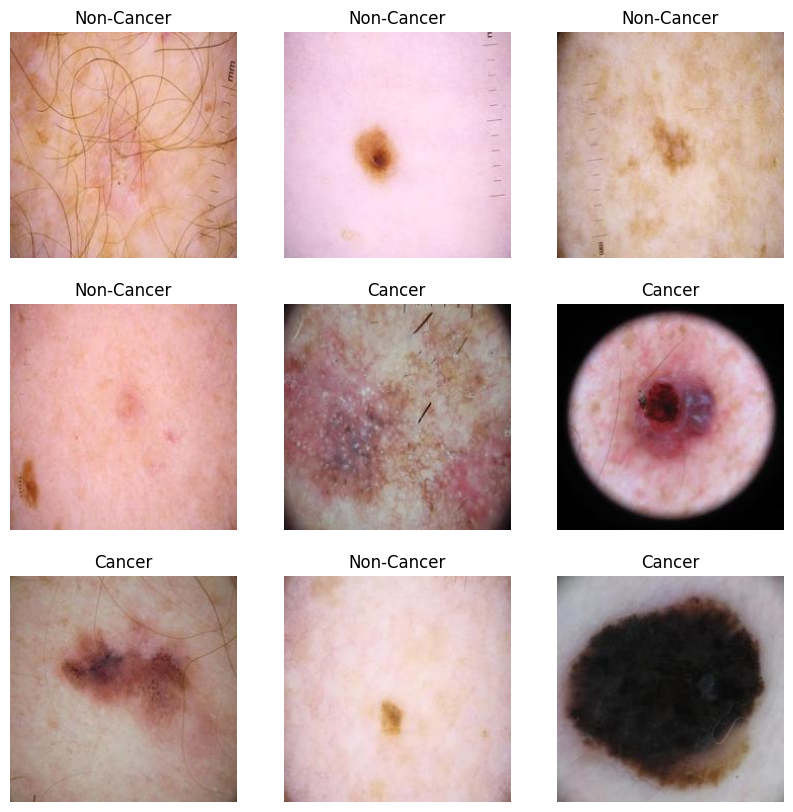

In [25]:
#Display some sample images from dataset
def plot_images(generator):
    images, labels= next(generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title('Cancer' if labels[i] == 1 else 'Non-Cancer')
        plt.axis("off")
    plt.show()
    
#Plot Training Images
plot_images(train_generator)

In [26]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Feature extraction
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Classification
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pickle

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

#  Use .keras instead of .h5
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # New Keras format
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Save history to file
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print(" Training complete. Model saved as 'best_model.keras'")



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7278 - loss: 0.7069
Epoch 1: val_loss improved from inf to 0.38874, saving model to best_model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.7281 - loss: 0.7061 - val_accuracy: 0.8206 - val_loss: 0.3887 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.38874
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4525 - learning_rate: 0.0010
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8507 - loss: 0.3469
Epoch 3: val_loss improved from 0.38874 to 0.36616, saving model to best_model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - accuracy: 0.8507 - loss: 0.3469 - val_accuracy: 0.8533 - val_loss: 0.3662 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: val_loss improved from 0.36616 to 0.26799, saving model to best_model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2680 - learning_rate: 0.0010
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8633 - loss: 0.3244
Epoch 5: val_loss did not improve from 0.26799
297/297 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.8633 - loss: 0.3243 - val_accuracy: 0.8775 - val_loss:

KeyboardInterrupt: 

In [28]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')


In [31]:
with open('training_history.pkl', 'rb') as f:
    old_history = pickle.load(f)

EOFError: Ran out of input

In [32]:
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load the saved best model (best_model.keras) that you want to continue training from
model = load_model('best_model.keras')

# Check the last completed epoch
last_epoch = 6  # Set this manually, since you know epoch 6 has been completed

# Total epochs you want to train
remaining_epochs = 30
new_epochs = remaining_epochs - last_epoch  # Epochs remaining to complete

print(f"Resuming training from epoch {last_epoch}. Training for {new_epochs} more epochs.")

# Callbacks for early stopping, learning rate reduction, and saving best model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Save best model here
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Resume training from epoch 7 (initial_epoch=last_epoch)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=new_epochs,  # Continue training for remaining epochs
    initial_epoch=last_epoch,  # Start from the last completed epoch
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Save the updated history for future reference (after the current training)
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("✅ Training resumed and completed. Best model saved as 'best_model.keras' and updated history saved as 'training_history.pkl'")


Resuming training from epoch 6. Training for 24 more epochs.
Epoch 7/24
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8635 - loss: 0.3231
Epoch 7: val_loss improved from inf to 0.29203, saving model to best_model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.8635 - loss: 0.3231 - val_accuracy: 0.8846 - val_loss: 0.2920 - learning_rate: 0.0010
Epoch 8/24

Epoch 8: val_loss improved from 0.29203 to 0.26608, saving model to best_model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2661 - learning_rate: 0.0010
Epoch 9/24
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8621 - loss: 0.3216
Epoch 9: val_loss did not improve from 0.26608
297/297 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.8621 - loss: 0.3216 - val_accuracy: 0.8805 - val_loss: 0.2840 - learning_rate: 0.0010
Epoch 10/24

Epoch 10: val_loss improved from 0.26608 to 0.21308, saving model to best_model.keras
297/297 ━━━

In [33]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 532ms/step - accuracy: 0.8835 - loss: 0.2763
Test Accuracy: 0.8815523982048035


In [35]:
model.save("skin_cancer_cnn2.h5")
# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")
test_pred_labels

62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 541ms/step


array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 533ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1000
           1       0.50      0.51      0.51       984

    accuracy                           0.51      1984
   macro avg       0.51      0.51      0.51      1984
weighted avg       0.51      0.51      0.51      1984



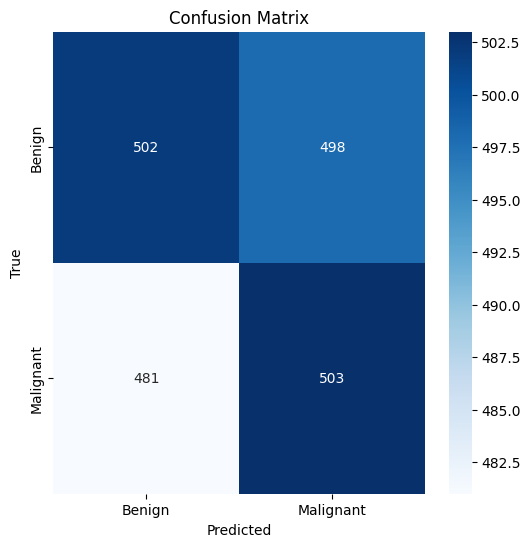

In [36]:
# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")  # Fixed the syntax error here

# Get the true labels
test_true_labels = test_generator.classes[:len(test_pred_labels)]  # Fixed slicing to match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))  # Fixed the syntax error here
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=test_generator.class_indices.keys(), 
             yticklabels=test_generator.class_indices.keys())  # Added yticklabels for clarity
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Load the entire model
model = load_model('/kaggle/working/skin_cancer_cnn2.h5')
def predict_skin_cancer (image_path, model):
img = image.load_img(image_path, target_size=(224, 224)) & Load Image
img_array = image.img_to_array(img) / 255.0 • Normalize
ing_array = np.expand_dims(img_array, axis=8) # Add batch dinension
* Make Prediction
prediction = model predict (img_array)
class_label = "Malignant" if prediction > 0.5 else "Benign"
# Show Image with Prediction
plt. imshow(img)
plt.title(f"Predicted: (class_label)*)
plt.axis("off')
plt.show()

SyntaxError: invalid character '•' (U+2022) (<ipython-input-37-5895b075aa77>, line 5)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load the entire model
model = load_model('/kaggle/working/skin_cancer_cnn2.h5')

def predict_skin_cancer(image_path, model):
    # Load Image
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert image to array and normalize
    img_array = image.img_to_array(img) / 255.0
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make Prediction
    prediction = model.predict(img_array)
    
    # Determine class label
    class_label = "Malignant" if prediction[0] > 0.5 else "Benign"
    
    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


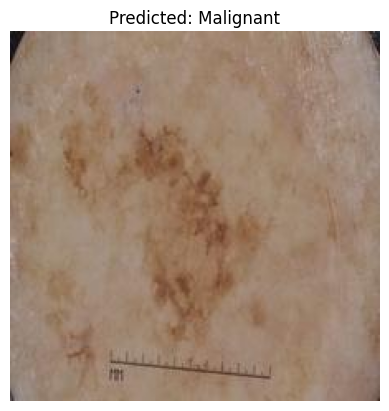

In [39]:
predict_skin_cancer("/kaggle/input/skin-cancer-dataset/train/Malignant/1001.jpg",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


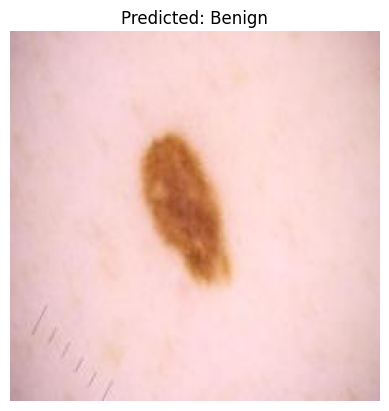

In [40]:
predict_skin_cancer("/kaggle/input/skin-cancer-dataset/test/Benign/6300.jpg",model)

In [41]:
model.save('best_model.keras')  # Save your model in .keras format


In [42]:
import pickle

# Save training history to a pickle file
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [43]:
import os

# Save model to output directory
os.makedirs('/kaggle/working', exist_ok=True)  # Creating the directory
model.save('/kaggle/working/best_model.keras')  # Save to this directory


In [44]:
# Save model and training history at the end of training
model.save('/kaggle/working/final_model.keras')
with open('/kaggle/working/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [46]:
import shutil

# Assuming your model is saved as 'pretrained_model.h5' or 'pretrained_model.pth'
shutil.move('/kaggle/working/final_model.keras', '/kaggle/working/pretrained_model.h5')


'/kaggle/working/pretrained_model.h5'

In [47]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-49-825aaa0e3821>, line 1)